# One-Layer Softmax Regression
As per listing 2 perform the programing tasks:
- Define the variables and placeholders
- Define a model
- Define the loss
- Define the accuracy
- Train with the GradientDescentOptimizer and a learning rate of 0.5
- Train with the AdamOptimizer (a slightly better optimizer) and a learning rate of
0.005

## Question
What loss and accuracy do you get when training over 10.000 iterations?

## Answer
For GradientDescentOptimizer we get a accuracy of a bit above 92% and a loss of a bit below 30.
For the AdamOptimizer we get a accuracy of around 93% and a loss a bit under 30. However, after around 93 epochs the accuracy drops rapidly to 10% (random guessing with 10 classes), which seems very strange. In the same time the loss function shows a gap. Quite likely the network is not numerically stable anymore and might suffer from gradient vanishing or explosion.

In [2]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data      

tf.set_random_seed(0)                                           

# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# 1. Define Variables and Placeholders
#the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
XX = tf.reshape(X, [-1, 784])

# 2. Define the model
Y = tf.nn.softmax(tf.matmul(XX, W) + b)

# 3. Define the loss function  
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))

# 4. Define the accuracy 
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 5. Define an optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## GradientDescentOptimizer

In [6]:
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [7]:
def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)

In [8]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999


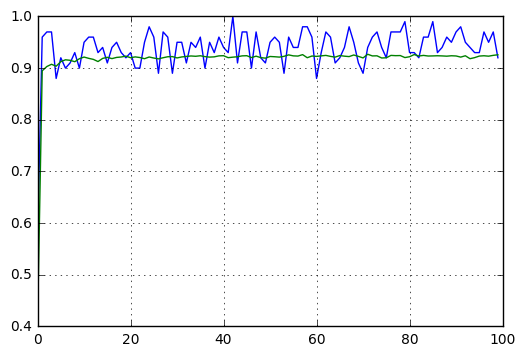

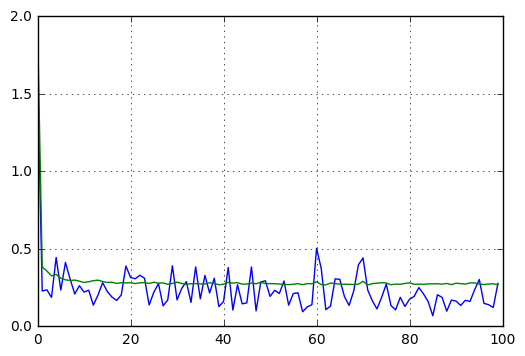

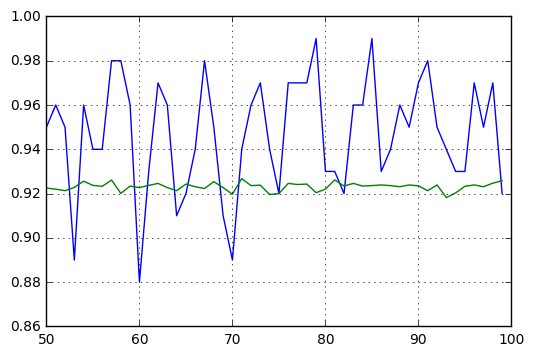

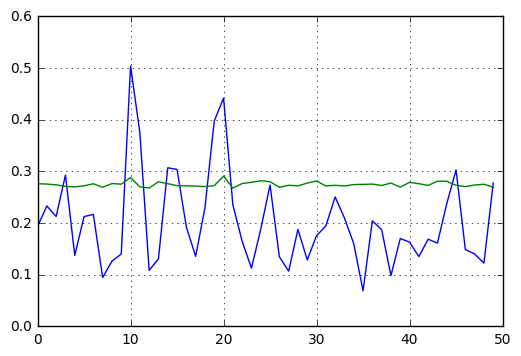

In [9]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()

## AdamOptimizer

In [10]:
# 5. Define an optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)

In [11]:
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [12]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999


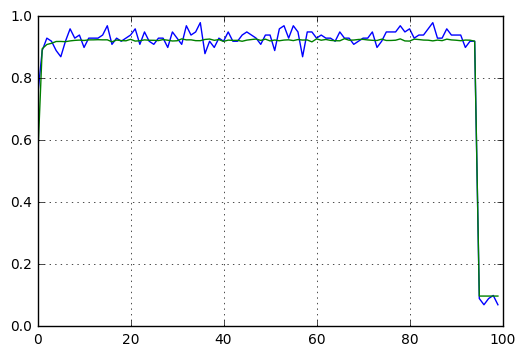

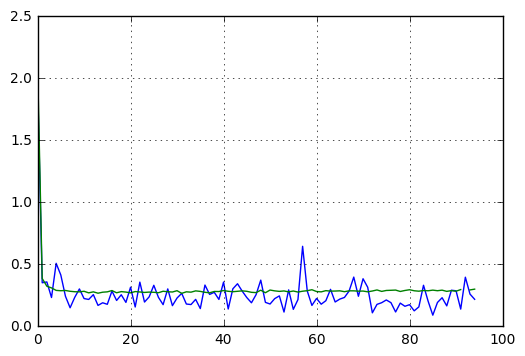

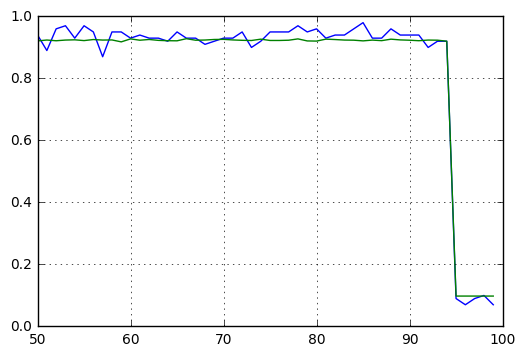

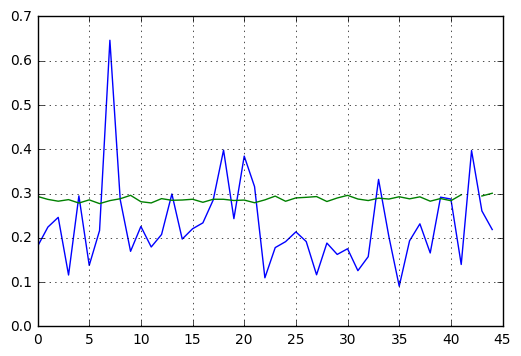

In [13]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()